In [44]:
import pandas as pd
#data=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\추가데이터\전체자료_(강우량추가).xlsx")
data=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\전체자료_(강우량추가).xlsx")


In [45]:
data.columns

Index(['Unnamed: 0', 'GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)',
       '동단위우량', '동단위시우량', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율',
       '제방', '수문', '암거', '구난시설', '노후건물개수', '노후_건물_밀도(동/km²)', '행정동_코드',
       '월평균소득', '면적당_소비액(백만원/km²)', '분기평균총지출', '고령자비율', '장애인비율', '행정동코드', '면적',
       '지하건물', '지하건물_밀도(동/km²)', '빗물펌프장까지의거리', '평균고도', '하천까지의거리', '일일최대강수량',
       '집중호우_발생횟수', '하천면적', '하천면적/면적'],
      dtype='object')

In [46]:
# 침수여부
data["침수여부"]=0
data.loc[data["침수횟수"]>=1,"침수여부"]=1
data["침수여부"].value_counts()
data['구단위시우량']=data['동단위우량']/data["동면적(k㎡)"]
# 면적당 "제방","수문","암거"
data["면적당제방"]=data["제방"]/data["동면적(k㎡)"]
data["면적당수문"]=data["수문"]/data["동면적(k㎡)"]
data["면적당암거"]=data["암거"]/data["동면적(k㎡)"]
data['면적당노후건물개수']=data["노후건물개수"]/data["동면적(k㎡)"]
data["면적당지하건물"]=data["지하건물"]/data["동면적(k㎡)"]


In [47]:
target="침수여부"
#use_feature=["구단위시우량","경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","제방","수문","암거","노후건물개수","빗물펌프장까지의거리","지하건물","평균고도",'하천까지의거리']
#use_feature=["구단위시우량",'집중호우_발생횟수','일일최대강수량',"경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","제방","수문","암거","노후건물개수","빗물펌프장까지의거리","지하건물","평균고도",'하천까지의거리']
#use_feature=["구단위시우량",'일일최대강수량',"경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","면적당제방","면적당수문","면적당암거","면적당노후건물개수","빗물펌프장까지의거리","면적당지하건물","평균고도",'하천까지의거리']
#use_feature=["구단위시우량","경사도","양호비율","도로_건물_면적_비율","녹지_면적_비율","면적당제방","면적당수문","면적당암거","면적당노후건물개수","빗물펌프장까지의거리","면적당지하건물","평균고도",'하천까지의거리']

# ttest
#use_feature=["구단위시우량","도로_건물_면적_비율","녹지_면적_비율","면적당노후건물개수","면적당지하건물"]
# 최고
#use_feature=["구단위시우량","도로_건물_면적_비율","녹지_면적_비율","면적당노후건물개수","면적당지하건물","월평균소득",'일일최대강수량']

#use_feature=["구단위시우량","도로_건물_면적_비율","녹지_면적_비율","면적당노후건물개수","면적당지하건물",'일일최대강수량']
use_feature=['구단위시우량','녹지_면적_비율','도로_건물_면적_비율','면적당노후건물개수','면적당지하건물','일일최대강수량','하천까지의거리']

In [48]:
data[use_feature]

,구단위시우량,녹지_면적_비율,도로_건물_면적_비율,면적당노후건물개수,면적당지하건물,일일최대강수량,하천까지의거리
0,7.36802,0.386556,0.307107,394.308943,453.658537,225.5,0.909096
1,7.36802,0.641702,0.137073,230.872483,305.369128,225.5,0.490531
2,7.36802,0.225413,0.147000,428.193833,358.149780,225.5,0.579168
3,7.36802,0.164587,0.087765,150.056370,202.593010,225.5,0.104944
4,7.36802,0.461577,0.169418,280.555556,161.111111,225.5,1.427201
...,...,...,...,...,...,...,...
402,8.79600,0.005765,0.438031,598.591549,1109.859155,398.5,1.346759
403,8.79600,0.059004,0.358275,554.037267,819.254658,398.5,1.073927
404,8.79600,0.045133,0.229434,11.956522,6.521739,398.5,1.163773
405,8.79600,0.147004,0.224797,367.948718,457.692308,398.5,0.369031


랜덤포레스트

In [49]:
# 1, Random_Forest
import sklearn.ensemble as skens
import sklearn.model_selection as skmod
import sklearn.preprocessing as skpre
import numpy as np
import scipy as sp
np.random.seed(10)

#모델 만들기 -> 최대 깊이 탐색
RT_model=skens.RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10,n_jobs=-1,oob_score=True)
RT_model.fit(X=data[use_feature],y=data[target])

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True,
                       random_state=10)

In [50]:
max_depth=max([estimator.tree_.max_depth for estimator in RT_model.estimators_]) # 최대 깊이 추출
print(max_depth)

20


In [51]:
# 최적의 깊이 탐색
params={"max_depth":sp.stats.randint(2,max_depth)}
RT_random_search = skmod.RandomizedSearchCV(RT_model,
 param_distributions=params, n_iter=100, cv=3, scoring='accuracy', random_state=10)

In [52]:
RT_random_search.fit(X=data[use_feature],y=data[target])

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=10),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000160CBE84440>},
                   random_state=10, scoring='accuracy')

In [53]:
#Random Forest 모델성능
RT_random_search.best_estimator_.oob_score_

0.7444717444717445

SVC

In [54]:
#SVC
minmax=skpre.MinMaxScaler()
scale_data=data.copy()
scale_data[use_feature]=minmax.fit_transform(X=scale_data[use_feature])

import sklearn.svm as sksvm
params={'C':[x/10 for x in range(1,11,2)],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3]}
svc_inner_model=sksvm.SVC()

#최적의 파라미터
svc_random_search = skmod.GridSearchCV(svc_inner_model,
 param_grid=params, cv=3, scoring='accuracy')
svc_random_search.fit(X=scale_data[use_feature],y=scale_data[target])

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [55]:
# 최종모델
svc_ensemble=skens.BaggingClassifier(estimator=svc_random_search.best_estimator_,n_estimators=100,n_jobs=-1,random_state=10,oob_score=True,bootstrap_features=False)
svc_ensemble.fit(X=scale_data[use_feature],y=scale_data[target])

BaggingClassifier(estimator=SVC(C=0.5, degree=2, kernel='poly'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=10)

In [56]:
svc_ensemble.oob_score_

0.7002457002457002

KNN

In [57]:
#KNN
import sklearn.neighbors as sknei
# 모델 만들기
knn_inner_model=sknei.KNeighborsClassifier(n_neighbors=5,n_jobs=-1) # 우선 k=5 기본값 사용

In [58]:
# k값찾기
k=int(np.sqrt(len(data)*2/3)) # 407개 데이터 중 2/3정도가 부트스트래핑으로 사용되므로 sqrt(data_set_size)와 가까운 홀수 선정
params={"n_neighbors":sp.stats.randint(3,k)}
KNN_random_search = skmod.RandomizedSearchCV(knn_inner_model,
 param_distributions=params, n_iter=100, cv=3, scoring='accuracy', random_state=10)

In [59]:
KNN_random_search.fit(X=scale_data[use_feature],y=scale_data[target])

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=100,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000160B5866A80>},
                   random_state=10, scoring='accuracy')

In [60]:
print(KNN_random_search.best_params_)

{'n_neighbors': 15}


In [61]:
KNN_random_search.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [62]:
#랜덤포레스트랑 최대한 동일하게(부트스트래핑은 하되, feature는 그대로 다 씀)
knn_ensemble=skens.BaggingClassifier(estimator=KNN_random_search.best_estimator_,n_estimators=100,n_jobs=-1,random_state=10,oob_score=True,bootstrap_features=False)
knn_ensemble.fit(X=scale_data[use_feature],y=scale_data[target])

BaggingClassifier(estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=15),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=10)

In [63]:
knn_ensemble.oob_score_

0.7248157248157249

결과 시각화

In [64]:
info_df=pd.DataFrame(RT_random_search.best_estimator_.feature_importances_,index=RT_model.feature_names_in_,columns=["information_gain"])

In [65]:
info_df.sort_values(["information_gain"],ascending=False,inplace=True)

In [90]:
info_df.rename(index={"구단위시우량":"평균시우량"},inplace=True)
info_df=info_df.reset_index().rename(columns={'index':"feature_names"})
info_df.to_excel("./info.xlsx")

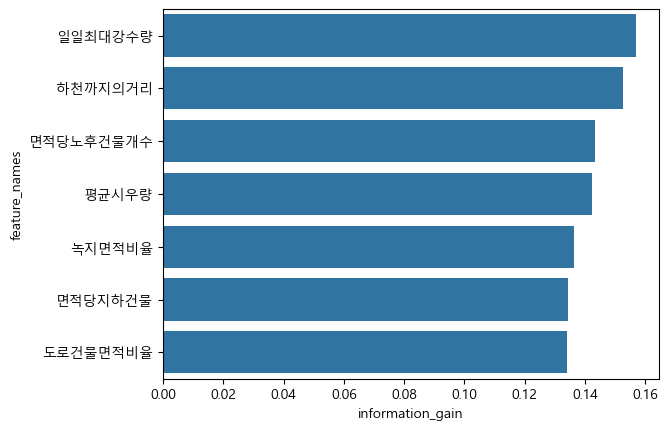

In [67]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

plt.figure()
sb.barplot(x=info_df["information_gain"],y=info_df["feature_names"])
#plt.title("Information_Gain")
plt.yticks(info_df["feature_names"],[x.replace("_","") for x in info_df["feature_names"]])
plt.show()

In [68]:
score_df=pd.DataFrame([RT_random_search.best_estimator_.oob_score_,svc_ensemble.oob_score_,knn_ensemble.oob_score_]
                      ,index=["Random Forest","SVM","KNN"],columns=["Accuracy"]).reset_index()
score_df.rename(columns={"index":"Model"},inplace=True)

In [69]:
score_df

,Model,Accuracy
0,Random Forest,0.744472
1,SVM,0.700246
2,KNN,0.724816


<Axes: xlabel='Model', ylabel='Accuracy'>

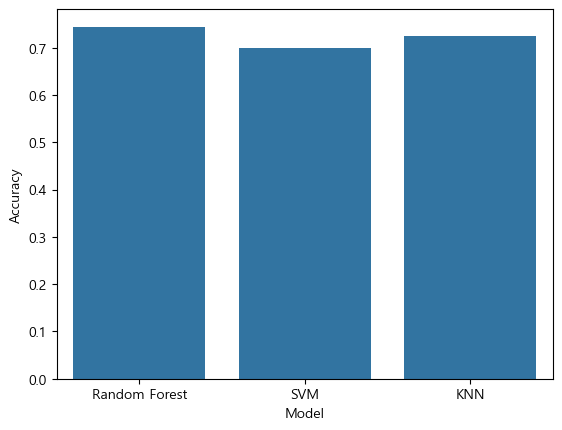

In [70]:
plt.figure()
sb.barplot(x=score_df["Model"],y=score_df["Accuracy"])

In [71]:
#로지스틱

In [72]:
import statsmodels.api as sm

In [73]:
logistic=sm.Logit(endog=scale_data[target],exog=scale_data[use_feature]).fit()

Optimization terminated successfully.
         Current function value: 0.592574
         Iterations 6


In [74]:
logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  407
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                 0.08158
Time:                        14:27:35   Log-Likelihood:                -241.18
converged:                       True   LL-Null:                       -262.60
Covariance Type:            nonrobust   LLR p-value:                 1.250e-07
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
구단위시우량          0.6251      0.357      1.753      0.080      -0.074       1.324
녹지_면적_비율       -0.5288      0.566     -0.934      0.350      -1.639       0.581
도로_건물_면적_비율    -0.4859      0.755     -0.644      0.520      -1.965       0.993
면적당노후건물개수      -0.0610      1.287     -0.047      0.962      -2.584       2.462
면적당지하건물         2.6587      1.267      2.099      0.036       0.176       5.141
일일최대강수량         1.1256      0.526      2.142      0.032       0.095       2.156
하천까지의거리        -2.4897      0.730     -3.410      0.001      -3.921      -1.059
===============================================================================
"""

In [81]:
predict_y=logistic.predict(scale_data[use_feature])

In [82]:
y_pred = np.round(predict_y)  # 예측값을 0 또는 1로 반올림

# 정확도 계산
accuracy = np.mean(y_pred == scale_data[target])
print(f'Accuracy: {accuracy}')

Accuracy: 0.7100737100737101


In [88]:
score_df.loc[3]=["Logistic Regression",accuracy]

In [89]:
score_df

,Model,Accuracy
0,Random Forest,0.744472
1,SVM,0.700246
2,KNN,0.724816
3,Logistic Regression,0.710074


<Axes: xlabel='Model', ylabel='Accuracy'>

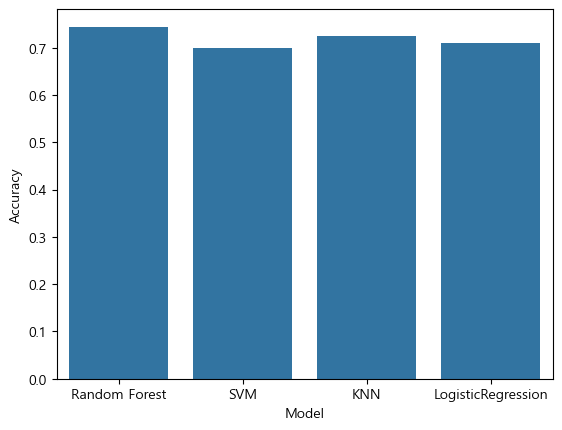

In [87]:
plt.figure()
sb.barplot(x=score_df["Model"],y=score_df["Accuracy"])